In [2]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [3]:
# Define dataset directories
train_dir = '/kaggle/input/dataset/dataset/training_set'
test_dir = '/kaggle/input/dataset/dataset/test_set'
single_pred_dir = '/kaggle/input/dataset/dataset/single_prediction'


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Load Test set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
cnn = Sequential()

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [10]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))  # Prevent overfitting
cnn.add(Dense(units=1, activation='sigmoid'))

In [13]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 286ms/step - accuracy: 0.5335 - loss: 0.6955 - val_accuracy: 0.6065 - val_loss: 0.6531
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - accuracy: 0.6406 - loss: 0.6337 - val_accuracy: 0.7110 - val_loss: 0.5801
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 176ms/step - accuracy: 0.6822 - loss: 0.5924 - val_accuracy: 0.7220 - val_loss: 0.5599
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - accuracy: 0.7081 - loss: 0.5615 - val_accuracy: 0.7430 - val_loss: 0.5251
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.7355 - loss: 0.5277 - val_accuracy: 0.7485 - val_loss: 0.5258
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.7511 - loss: 0.5099 - val_accuracy: 0.7550 - val_loss: 0.5194
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.7588 - loss: 0.4924 - val_accuracy: 0.7825 - val_loss: 0.4790
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 168ms/step - accuracy: 0.7697 - loss: 0.4796 - val

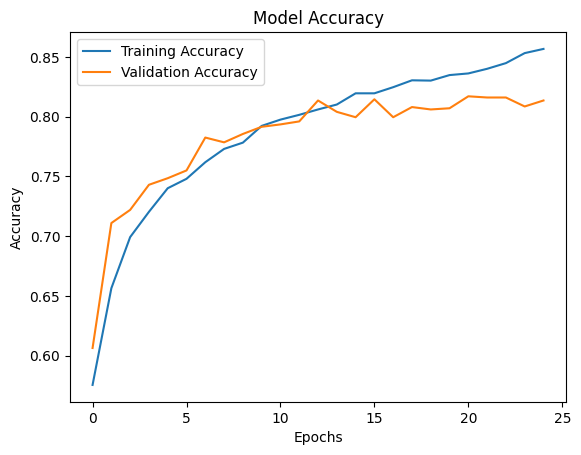

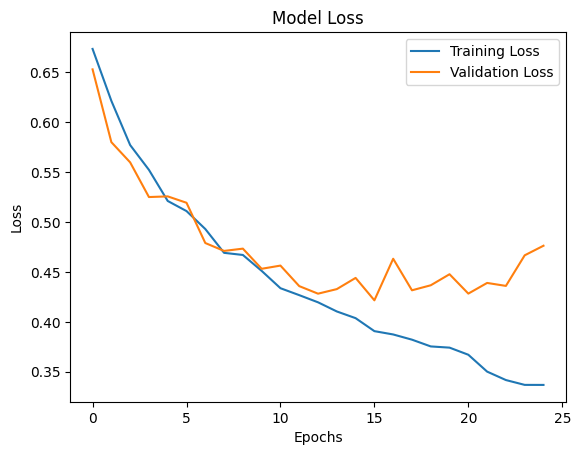

In [15]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.0  # Rescale

    prediction = cnn.predict(test_image)
    if prediction[0][0] >= 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")


predict_image('/kaggle/input/dataset/dataset/single_prediction/cat_or_dog_2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: Cat


In [17]:
!pip freeze > requirements.txt


# Github Link:- https://github.com/vivekboghara31/image-classification-using-cnn
# Medium Link:- https://medium.com/@vivekboghara31/image-classification-using-convolutional-neural-networks-cnn-b4a63dfbe966